In [1]:
#!pip install shap
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
import xgboost


In [2]:
# 예제 5.23 SHAP 모듈로부터 보스턴 데이터세트를 불러와서 학습용과 테스트용 데이터세트로 분리하는 코드
X, y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


In [3]:
pd.DataFrame(y_train[:10]) # 집값 가격 예측 문제

,0
0,25.3
1,23.3
2,7.2
3,21.2
4,11.7
5,27.0
6,29.6
7,26.5
8,43.5
9,23.6


## crim<br>
### town별 1인당 범죄율
## zn<br>
### 25,000 평방피트 당 주거지역의 비율 
## indus<br>
### 도시 당 비-소매업종 acre의 비율 
## chas<br>
### Charles River 더미 변수 (= 강변가일 경우 1; 아닐 경우 0).
## nox<br>
### 질소산화물 농도 (1/10,000,000).
## rm<br>
### 가구당 평균 방수
## age<br>
### 1940년 이전에 건설된 건물 중 소유자가 차지하는 비율.
## dis<br>
### 5개의 보스턴 고용 센터까지의 거리의 가중 평균. 즉 업무지구와의 거리
## rad<br>
### 방사형 고속도로에 대한 접근성 지수.
## tax<br>
### $10,000당 전체 가치 재산세율.
## ptratio<br>
### 도시별 학생-교사 비율.
## B<br>
### 1000(Bk - 0.63)^2, 여기서 Bk는 도시별 흑인 비율.
## lstat<br>
### 저소득층의 비율 (퍼센트).
## medv<br>
### 소유자가 거주하는 주택 가치의 중간값 ($1000 단위)

Text(0, 0.5, 'MEDV \n Price $1,000')

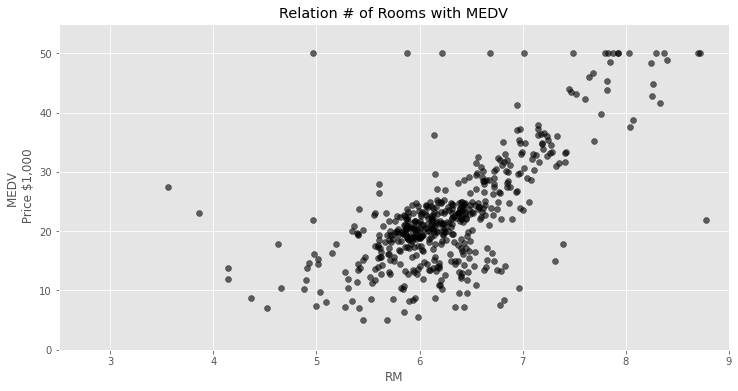

In [4]:
# 예제 5.23 방의 개수(RM)와 집값 간의 관계를 산점도로 그리는 코드

# drawing scatter plot
matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

In [5]:
# 예제 5.38 선형 모델을 이용해서 방 개수와 주택 가격 간의 관계를 구하는 코드

from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_))


a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM -32.40


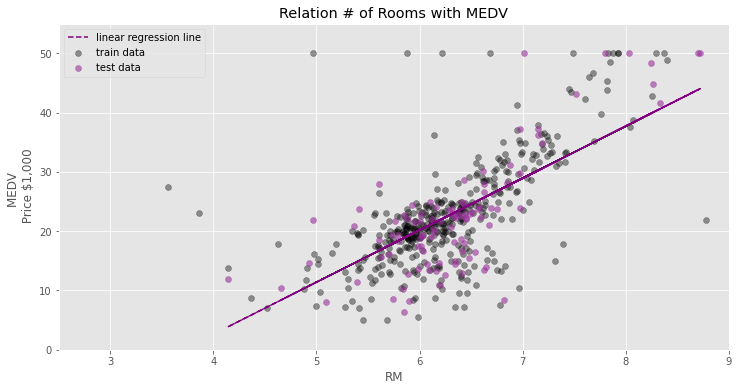

In [6]:
# 예제 5.39 방의 개수가 달라질 때 주택 매매 가격을 예측하는 그래프와 데이터를 한꺼번에 플롯으로 그리는 코드

# scatter Train, Test data with Linear Regression Prediction
fig, ax1 = plt.subplots(1,1, figsize = (12,6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='train data')
ax1.scatter(X_test['RM'], y_test, color='#993299', alpha=0.6, label='test data')
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')
ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='--', label='linear regression line')
ax1.legend()


In [7]:
# 예제 5.40 모델 예측치와 실제 집값 간의 RMSE를 구하는 코드

from sklearn.metrics import mean_squared_error  # mean_squard_error만 있음 
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))

RMSE: 6.383135


In [8]:
# 예제 5.41 xgboost의 부스팅 회귀 모델로 주택 매매 가격을 예측하는 모델을 만들고 학습하는 코드


# train XGBoost model
model = xgboost.XGBRegressor(tree_method = 'auto', objective ='reg:squarederror')
model.fit(X_train, y_train)

# 예제 5.42 전체 피처를 사용해서 학습시킨 모델의 RMSE를 구하는 코드
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.006564


In [10]:
# 예제 5.43 SHAP의 설명체를 정의하고 섀플리 값을 계산하는 로직

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Train data의 5번째 주택에 대한 섀플리 값
# (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[5,:], X_train.iloc[5,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Text(0, 0.5, 'MEDV \n Price $1,000')

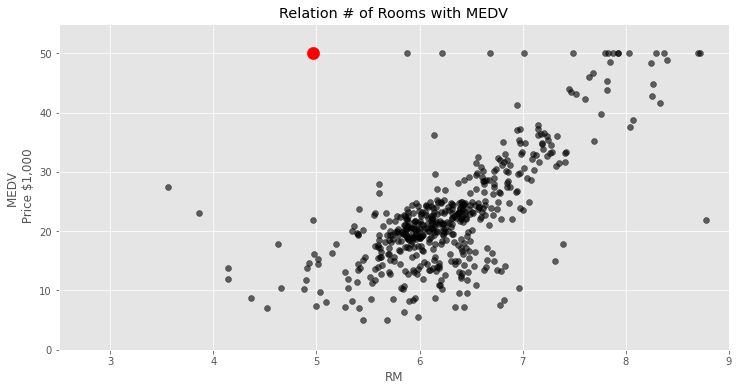

In [11]:
# 예제 5.44 259번 데이터에 대해서 방의 개수(RM)와 집 가격(MEDV)이 어떤 관계가 있는지 플롯으로 그리는 코드

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

idx = 259
ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')


In [12]:
# 예제 5.45 데이터 259번에 대한 섀플리 영향도를 그리는 코드

# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[259,:], X_train.iloc[259,:])


In [13]:
# 예제 5.46 전체 데이터에 대한 섀플리 값을 플롯으로 그리는 코드

# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

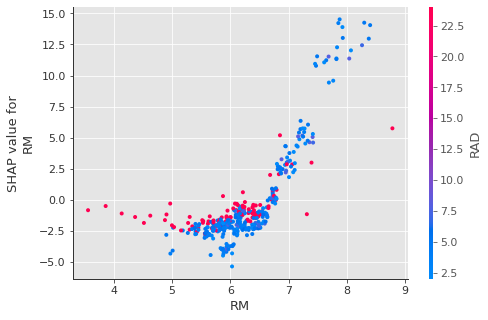

In [14]:
# 예제 5.47 방 개수의 변화가 집값 변화에 미치는 영향력을 시각화한 결과 

# create a SHAP dependence plot to show the effect
# of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)

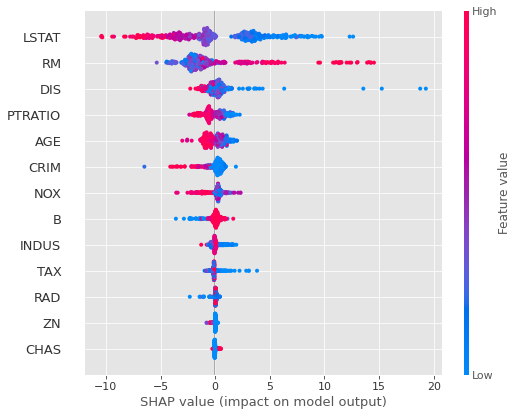

In [15]:
# 예제 5.48 전체 피처들이 섀플리 값 결정에 어떻게 관여하는지 시각화하는 코드

# summarize the effects of all the features

shap.summary_plot(shap_values, X_train)

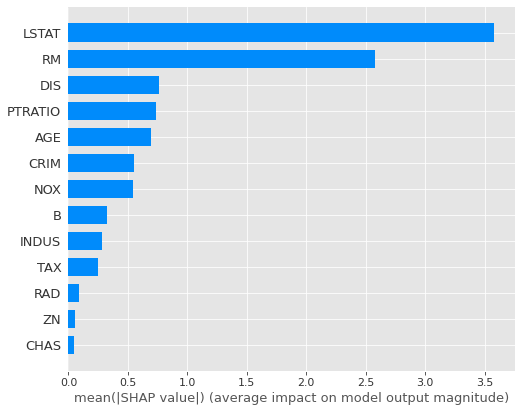

In [16]:
# 예제 5.49 피처별 섀플리 값을 막대 타입으로 비교하는 코드

shap.summary_plot(shap_values, X_train, plot_type="bar")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

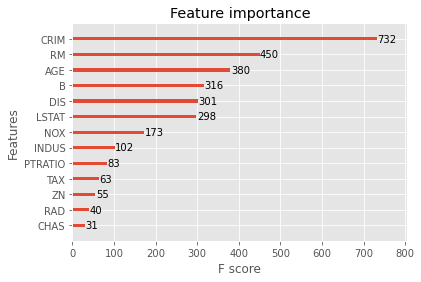

In [17]:
xgboost.plot_importance(model)